In [1]:
import pandas as pd


In [3]:
df = pd.read_csv("data/uber_data.csv")


In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [7]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [9]:
df = df.drop_duplicates().reset_index(drop=True)
df['trip_id'] = df.index

In [11]:
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,1
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,3
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,4


In [13]:
datetime_dim = df[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)
datetime_dim['tpep_pickup_datetime'] = datetime_dim['tpep_pickup_datetime']
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday

datetime_dim['tpep_dropoff_datetime'] = datetime_dim['tpep_dropoff_datetime']
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday


datetime_dim['datetime_id'] = datetime_dim.index

# datetime_dim = datetime_dim.rename(columns={'tpep_pickup_datetime': 'datetime_id'}).reset_index(drop=True)
datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday',
                             'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]
#
datetime_dim.head()


,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01,0,1,3,2016,1,2016-03-01 00:07:55,0,1,3,2016,1
1,1,2016-03-01,0,1,3,2016,1,2016-03-01 00:11:06,0,1,3,2016,1
2,2,2016-03-01,0,1,3,2016,1,2016-03-01 00:31:06,0,1,3,2016,1
3,3,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1
4,4,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1


In [15]:
passenger_count_dim = df[['passenger_count']].reset_index(drop=True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

trip_distance_dim = df[['trip_distance']].reset_index(drop=True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

In [17]:
passenger_count_dim.head()

,passenger_count_id,passenger_count
0,0,1
1,1,1
2,2,2
3,3,3
4,4,5


In [19]:
trip_distance_dim.head()

,trip_distance_id,trip_distance
0,0,2.50
1,1,2.90
2,2,19.98
3,3,10.78
4,4,30.43


In [21]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim = df[['RatecodeID']].reset_index(drop=True)
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

# rate_code_dim.head()

In [23]:
rate_code_dim.head()


,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,1,Standard rate
2,2,1,Standard rate
3,3,1,Standard rate
4,4,3,Newark


In [25]:
pickup_location_dim = df[['pickup_longitude', 'pickup_latitude']].reset_index(drop=True)
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index
pickup_location_dim = pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']] 


dropoff_location_dim = df[['dropoff_longitude', 'dropoff_latitude']].reset_index(drop=True)
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]

In [27]:
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}
payment_type_dim = df[['payment_type']].reset_index(drop=True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]

In [29]:
payment_type_dim.head(20)

,payment_type_id,payment_type,payment_type_name
0,0,1,Credit card
1,1,1,Credit card
2,2,1,Credit card
3,3,1,Credit card
4,4,1,Credit card
5,5,1,Credit card
6,6,2,Cash
7,7,3,No charge
8,8,1,Credit card
9,9,1,Credit card


In [31]:
fact_table = df.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
             .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
             .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
             .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
             .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id')\
             .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
             .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [33]:

payment_type_dim.columns

Index(['payment_type_id', 'payment_type', 'payment_type_name'], dtype='object')

In [35]:
fact_table.columns

Index(['trip_id', 'VendorID', 'datetime_id', 'passenger_count_id',
       'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag',
       'pickup_location_id', 'dropoff_location_id', 'payment_type_id',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [37]:
fact_table


,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,1,1,1,1,N,1,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,2,2,2,2,N,2,2,2,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,3,3,3,3,N,3,3,3,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,4,2,4,4,4,4,N,4,4,4,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,99995,99995,99995,99995,N,99995,99995,99995,5.0,0.0,0.5,0.00,0.00,0.3,5.80
99996,99996,1,99996,99996,99996,99996,N,99996,99996,99996,14.0,0.0,0.5,2.00,0.00,0.3,16.80
99997,99997,1,99997,99997,99997,99997,N,99997,99997,99997,29.0,0.0,0.5,8.80,5.54,0.3,44.14
99998,99998,2,99998,99998,99998,99998,N,99998,99998,99998,5.5,0.5,0.5,1.36,0.00,0.3,8.16


In [43]:
# Extract time of day from pickup datetime
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
df['time_of_day'] = df['tpep_pickup_datetime'].dt.hour.apply(categorize_time_of_day)

In [45]:
# Question 1: Average Trip Distance by Time of Day
avg_trip_distance = df.groupby('time_of_day')['trip_distance'].mean().reset_index()
print(avg_trip_distance)

  time_of_day  trip_distance
0   Afternoon       2.965064
1     Morning       2.804968
2       Night       3.874062


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\AppData\Local\Temp\ipykernel_29540\566627343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='trip_distance', data=avg_trip_distance, palette='viridis')


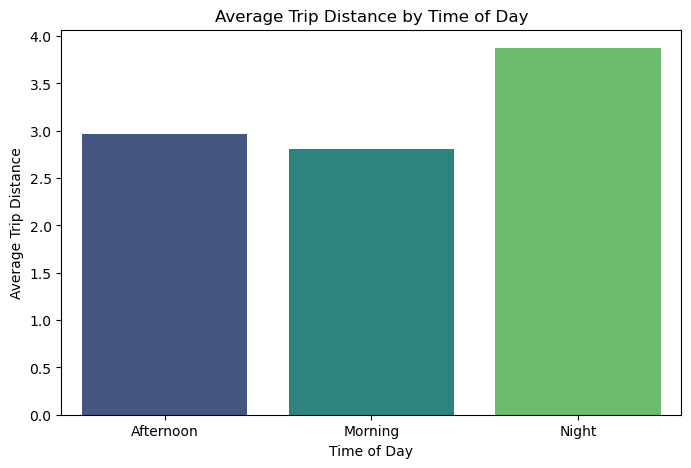

In [51]:
# Visualization for Question 1:What is the average trip distance for different times of day (morning, afternoon, night)?
plt.figure(figsize=(8, 5))
sns.barplot(x='time_of_day', y='trip_distance', data=avg_trip_distance, palette='viridis')
plt.title('Average Trip Distance by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Trip Distance')
plt.show()

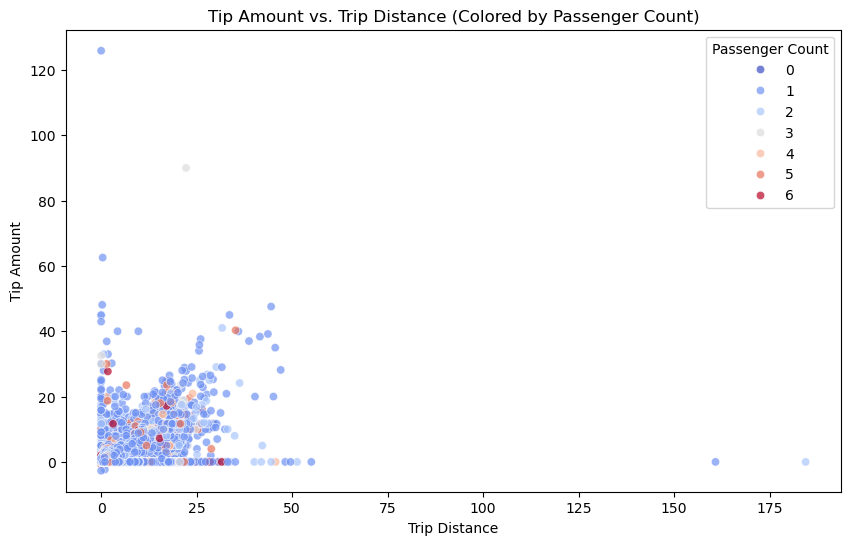

In [53]:
# Question 2: Tip Amount vs. Trip Distance and Passenger Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', hue='passenger_count', data=df, palette='coolwarm', alpha=0.7)
plt.title('Tip Amount vs. Trip Distance (Colored by Passenger Count)')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.legend(title='Passenger Count')
plt.show()


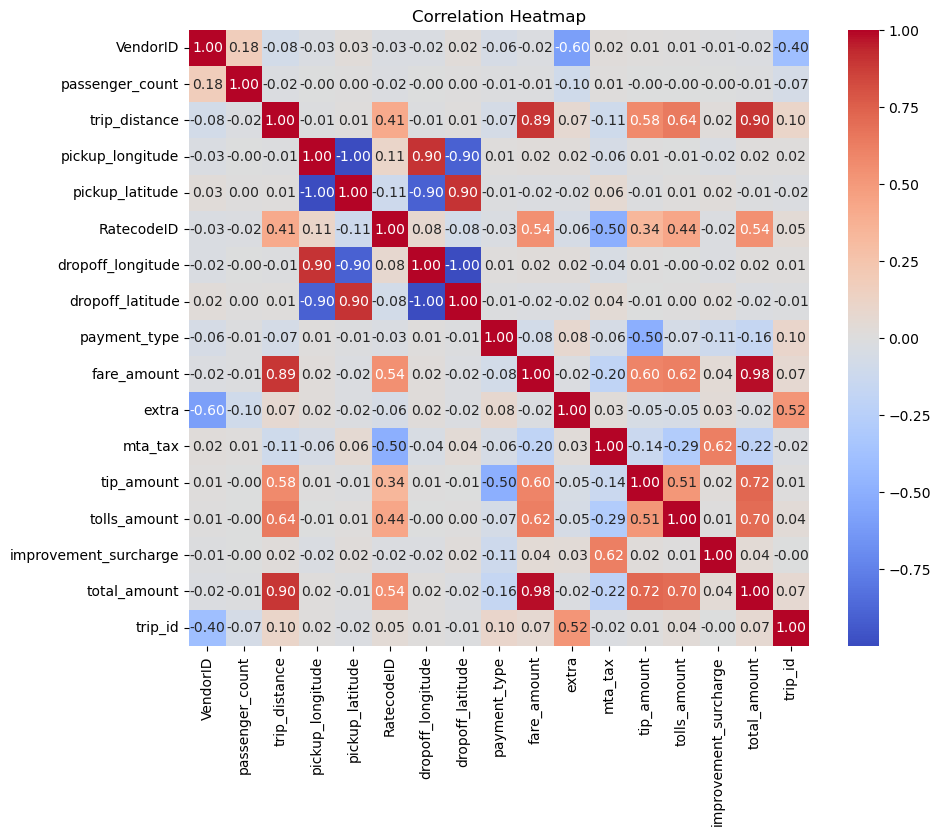

In [57]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


In [59]:
# Feature Engineering (if needed)
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

In [131]:
print(df.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_id', 'time_of_day',
       'fare_per_mile'],
      dtype='object')


In [133]:
from sklearn.cluster import KMeans


In [135]:
# Define the number of clusters (zones) based on your data or region
n_clusters = 10  # You can adjust this number as needed


In [137]:
# Question 3: Pickup and drop-off locations during peak hours (7 AM to 9 AM)
peak_hours = df[(df['tpep_pickup_datetime'].dt.hour >= 7) & (df['tpep_pickup_datetime'].dt.hour <= 9)]


In [139]:
# Clustering pickup and dropoff locations using KMeans
pickup_coords = peak_hours[['pickup_latitude', 'pickup_longitude']]
dropoff_coords = peak_hours[['dropoff_latitude', 'dropoff_longitude']]

In [141]:
# KMeans clustering for pickup locations
kmeans_pickup = KMeans(n_clusters=n_clusters, random_state=42)
peak_hours['pickup_zone'] = kmeans_pickup.fit_predict(pickup_coords)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\hp\AppData\Local\Temp\ipykernel_29540\1580070533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_hours['pickup_zone'] = kmeans_pickup.fit_predict(pickup_coords)


In [143]:
# KMeans clustering for dropoff locations
kmeans_dropoff = KMeans(n_clusters=n_clusters, random_state=42)
peak_hours['dropoff_zone'] = kmeans_dropoff.fit_predict(dropoff_coords)


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\hp\AppData\Local\Temp\ipykernel_29540\2503759497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_hours['dropoff_zone'] = kmeans_dropoff.fit_predict(dropoff_coords)


In [145]:
# Find most frequent pickup and dropoff zones during peak hours
most_frequent_pickup = peak_hours['pickup_zone'].value_counts().head(10)
most_frequent_dropoff = peak_hours['dropoff_zone'].value_counts().head(10)

C:\Users\hp\AppData\Local\Temp\ipykernel_29540\3205055328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_pickup.index, y=most_frequent_pickup.values, palette='Blues_d')


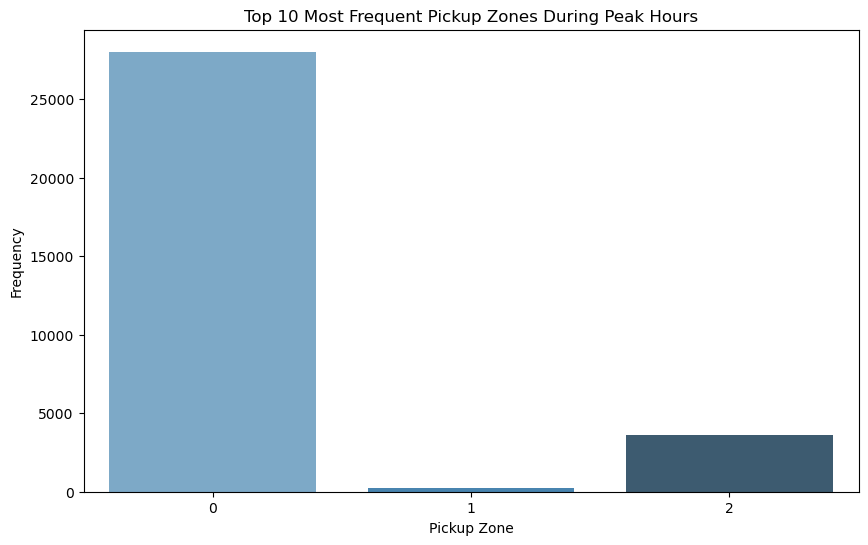

In [147]:
# Visualization for Pickup Zones
plt.figure(figsize=(10, 6))
sns.barplot(x=most_frequent_pickup.index, y=most_frequent_pickup.values, palette='Blues_d')
plt.title('Top 10 Most Frequent Pickup Zones During Peak Hours')
plt.xlabel('Pickup Zone')
plt.ylabel('Frequency')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_29540\2366181222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_frequent_dropoff.index, y=most_frequent_dropoff.values, palette='Reds_d')


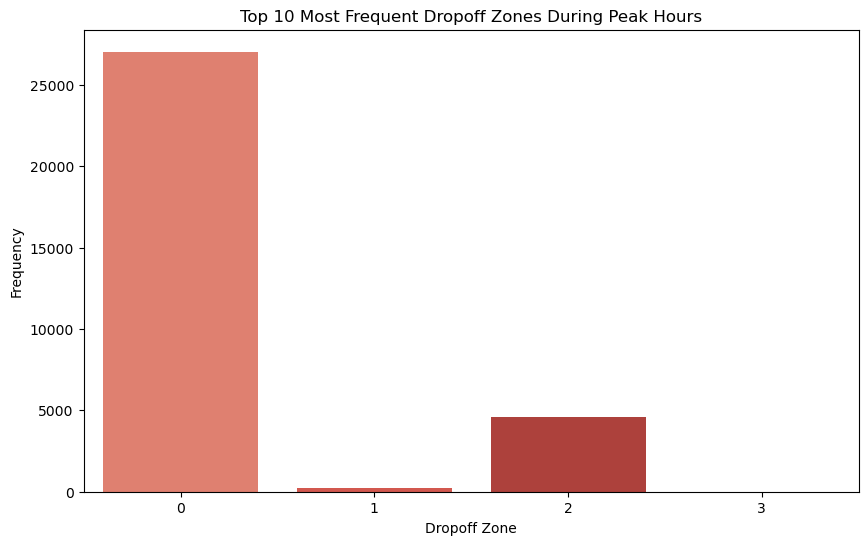

In [149]:
# Visualization for Dropoff Zones
plt.figure(figsize=(10, 6))
sns.barplot(x=most_frequent_dropoff.index, y=most_frequent_dropoff.values, palette='Reds_d')
plt.title('Top 10 Most Frequent Dropoff Zones During Peak Hours')
plt.xlabel('Dropoff Zone')
plt.ylabel('Frequency')
plt.show()

In [151]:
# Question 4: Correlation between payment type and total fare amount
payment_fare_correlation = df.groupby('payment_type')['total_amount'].mean().reset_index()
print(payment_fare_correlation)


   payment_type  total_amount
0             1     17.461352
1             2     12.547602
2             3     11.586957
3             4     10.049180


C:\Users\hp\AppData\Local\Temp\ipykernel_29540\4193204598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='total_amount', data=payment_fare_correlation, palette='Set2')


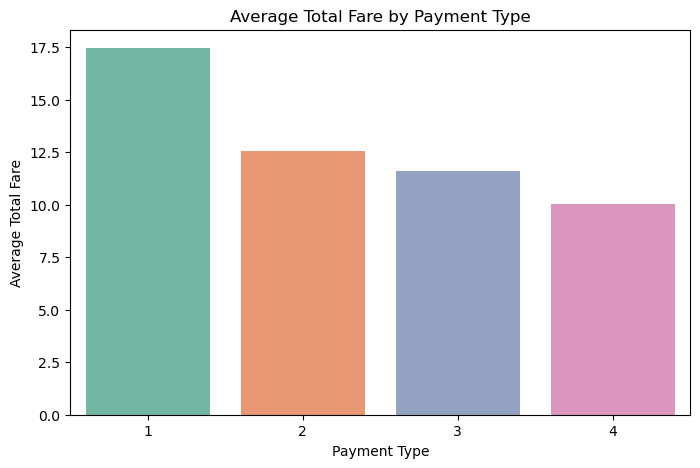

In [153]:
# Visualization for Question 4
plt.figure(figsize=(8, 5))
sns.barplot(x='payment_type', y='total_amount', data=payment_fare_correlation, palette='Set2')
plt.title('Average Total Fare by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Total Fare')
plt.show()


In [159]:
# Question 5: Fare variation for similar distances with different RatecodeIDs
bins = [0, 1, 5, 10, 20, 50, 100]
labels = ['0-1', '1-5', '5-10', '10-20', '20-50', '50-100']
df['distance_range'] = pd.cut(df['trip_distance'], bins=bins, labels=labels)

# Group by distance range and ratecode_id, then calculate mean fare
fare_by_distance_and_ratecode = df.groupby(['distance_range', 'RatecodeID'])['total_amount'].mean().reset_index()
print(fare_by_distance_and_ratecode)


C:\Users\hp\AppData\Local\Temp\ipykernel_29540\1694953277.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_by_distance_and_ratecode = df.groupby(['distance_range', 'RatecodeID'])['total_amount'].mean().reset_index()


   distance_range  RatecodeID  total_amount
0             0-1           1     10.393630
1             0-1           2     65.000000
2             0-1           3           NaN
3             0-1           4           NaN
4             0-1           5    111.000000
5             0-1           6           NaN
6             1-5           1     16.957617
7             1-5           2     64.833333
8             1-5           3     53.666667
9             1-5           4      8.000000
10            1-5           5     69.709677
11            1-5           6           NaN
12           5-10           1     33.962880
13           5-10           2     65.200000
14           5-10           3     69.666667
15           5-10           4     32.923077
16           5-10           5     62.380952
17           5-10           6           NaN
18          10-20           1     49.764660
19          10-20           2     64.733012
20          10-20           3     90.943662
21          10-20           4   

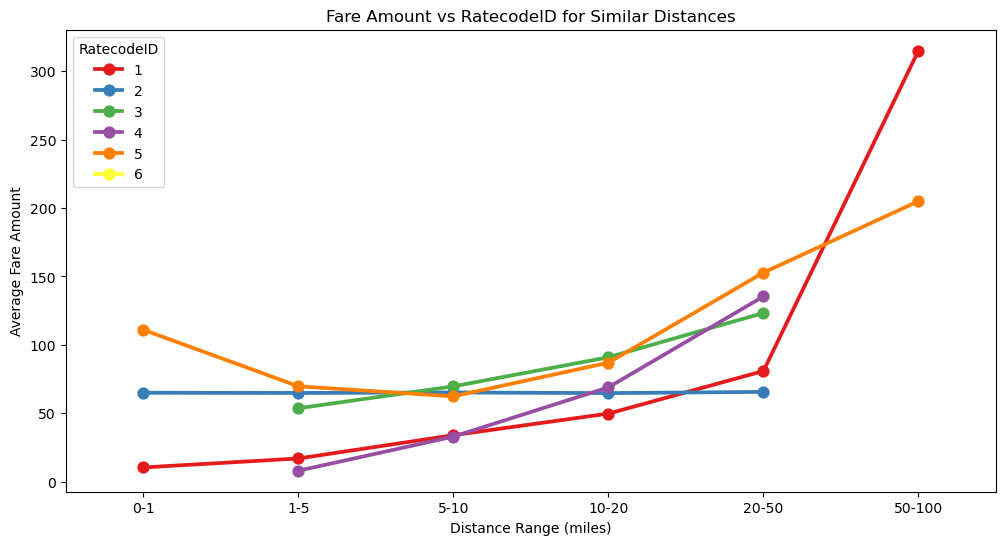

In [163]:
# Visualization for Question 5
plt.figure(figsize=(12, 6))
sns.pointplot(x='distance_range', y='total_amount', hue='RatecodeID', data=fare_by_distance_and_ratecode, markers='o', linestyles='-', palette='Set1')
plt.title('Fare Amount vs RatecodeID for Similar Distances')
plt.xlabel('Distance Range (miles)')
plt.ylabel('Average Fare Amount')
plt.show()
